# Método do Trapézio para resolver um PVI

Considere o PVI $$\dot{y}=f(t,y),$$ com $y(t_0)=y_0$.

In [67]:
using Plots

In [68]:
function euler(f,ci,dt,tf)
    t = Float64[]
    y = Float64[]
    push!(t,ci[1])
    push!(y,ci[2])

    while t[end] < tf
        newy = y[end] + dt * f(t[end],y[end])
        push!(y,newy)
        newt = t[end] + dt
        push!(t,newt)
    end

    return(t,y)

end

euler (generic function with 1 method)

In [69]:
function trapezio1(f,ci,dt,tf,ϵ)
  
    (t,yi) = euler(f,ci,dt,tf)

    y = Float64[]
    push!(y,ci[2])

    n = size(t,1)
    
    for i in 1 : n - 1
        j = 0
        yant = yi[i]
        while true
            newy = y[end] + 0.5 * dt * (f(t[i],y[end]) + f(t[i+1],yant))
            if abs(newy - yant) < ϵ
                push!(y,newy)
                break
            else
                yant = newy
                j += 1
            end
        end
    end
    
    return(t,y)
end

trapezio1 (generic function with 1 method)

In [70]:
# Test problem

f(t,y) = -y^2
ci = [0.0;1.0]
ex(t) = 1 / (1 + t)
tf = 5.0
dt = 0.5
ϵ = 1.e-8
(t,y) = trapezio1(f,ci,dt,tf,ϵ)
(~,ye) = euler(f,ci,dt,tf)

([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], [1.0, 0.5, 0.375, 0.3046875, 0.258270263671875, 0.22491849912330508, 0.19962433349936498, 0.17969939623683212, 0.16355345973289112, 0.1501785926375919, 0.13890178779428802])

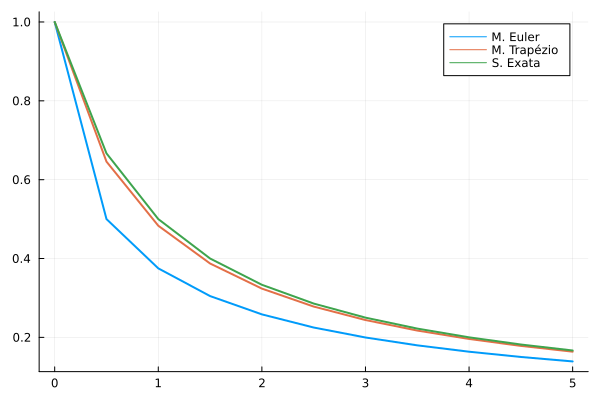

In [71]:
plot(t,ye,lw=2,label="M. Euler")
plot!(t,y,lw=2,label="M. Trapézio")
plot!(t,ex.(t),lw=2,label="S. Exata")